In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./insurance.csv")


## EDA

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1338, 7)


In [6]:
# basic information about the dataset
print("Information about the dataset: \n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Information about the dataset: 
 None


In [7]:
# describe the dataset
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [8]:
# check the null values
print("Null values in the dataset: \n", df.isnull().sum())

Null values in the dataset: 
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [9]:
# check all the columns
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


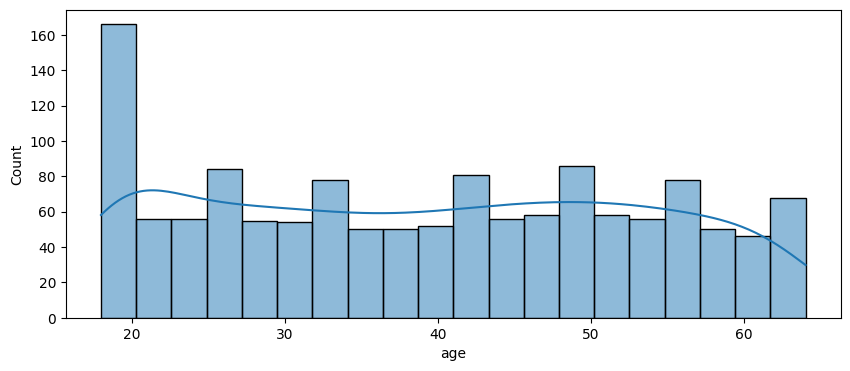

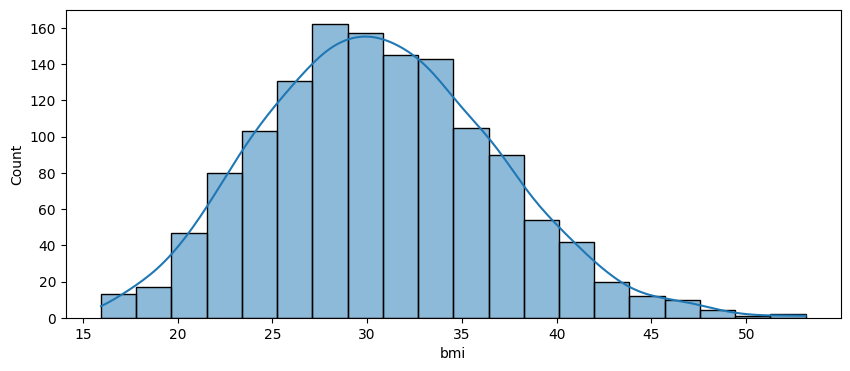

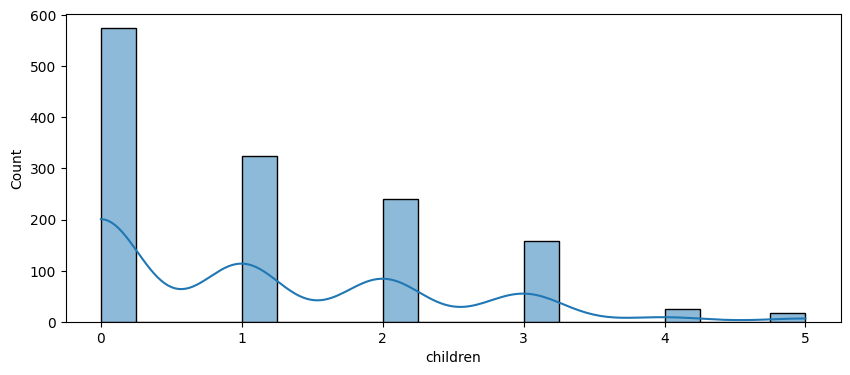

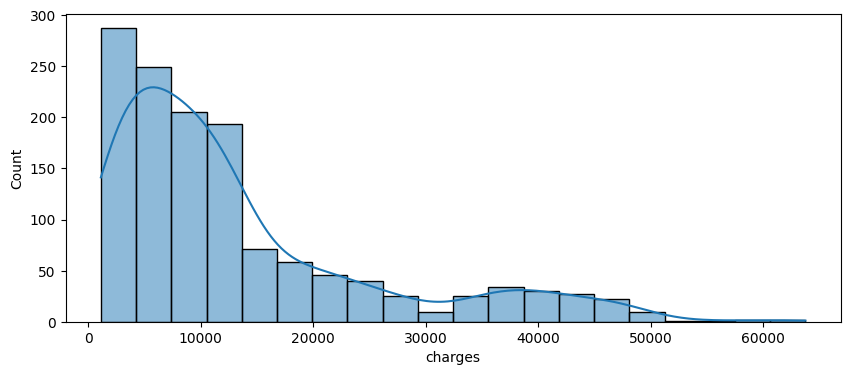

In [10]:
# check the distribution in our numeric columns
columns = ['age', 'bmi', 'children', 'charges']
for col in columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True , bins=20) # here kde is used to plot the kernel density estimation , and bins is used to set the number of bins


<Axes: xlabel='children', ylabel='count'>

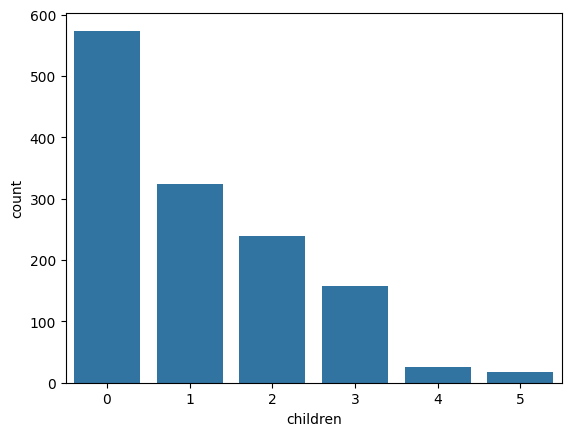

In [11]:
sns.countplot(x=df["children"])

<Axes: xlabel='sex', ylabel='count'>

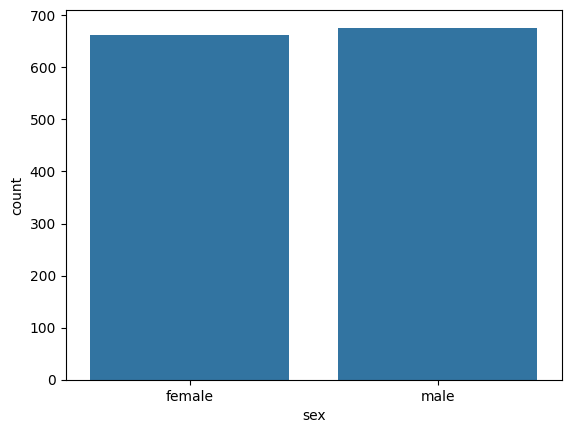

In [12]:
sns.countplot(x=df["sex"])


<Axes: xlabel='smoker', ylabel='count'>

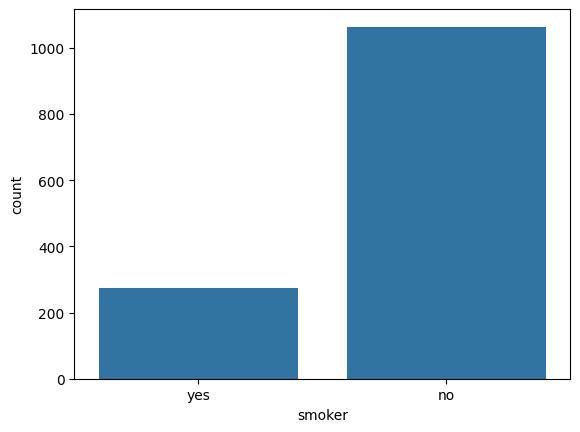

In [13]:
sns.countplot(x=df["smoker"])


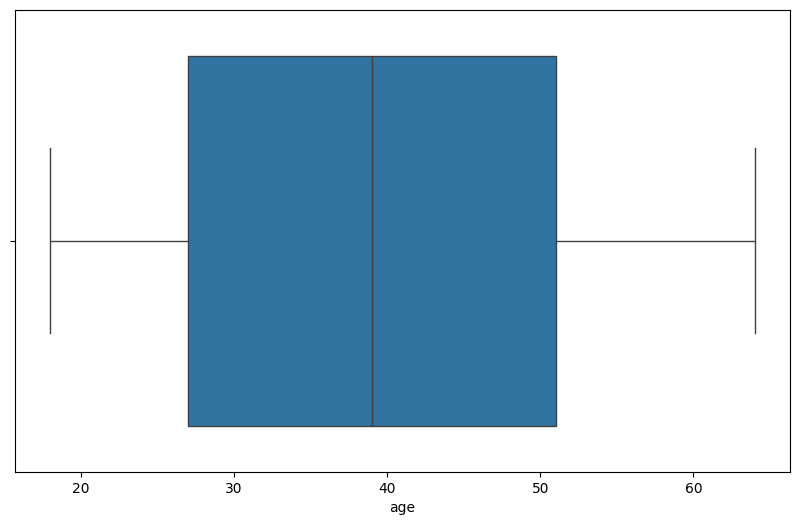

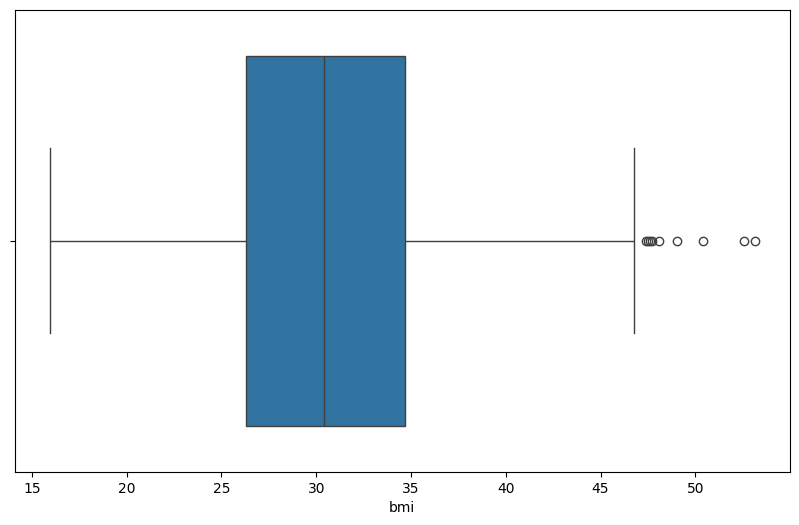

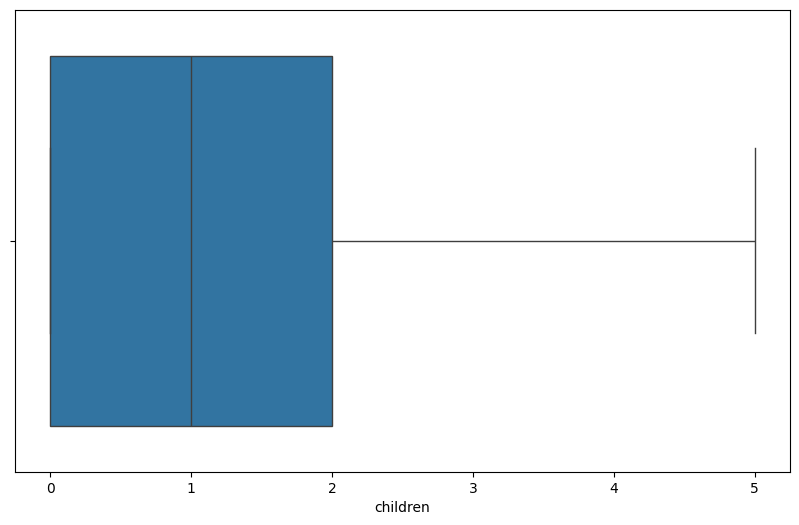

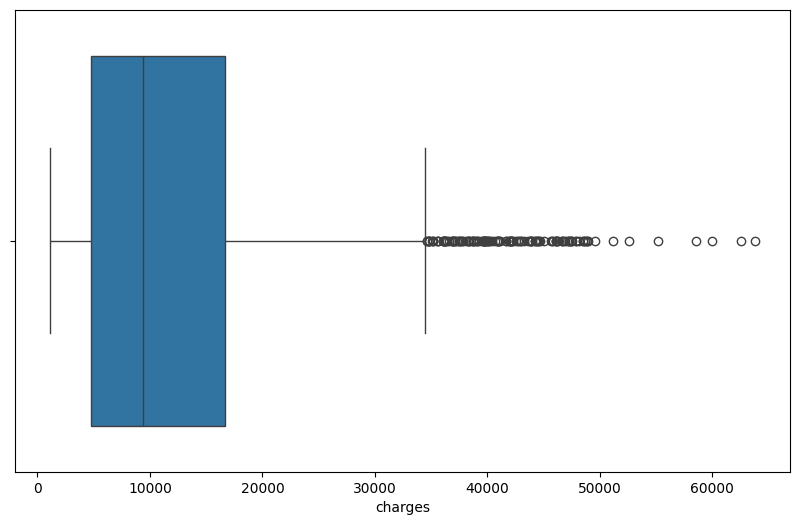

In [14]:
# now create the boxplot for columns for checking the outliers
for col in columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df[col])

## Data Cleaning And Pre-processing

1. Handling Missing Values
Identify missing data (NaN, NULL).

Techniques: Deletion, mean/median/mode imputation, interpolation.

2. Removing Duplicates
Eliminate repeated records to avoid bias in analysis.

3. Data Type Conversion
Convert data types to appropriate formats (e.g., strings to dates, integers to float).

4. Handling Outliers
Detect using statistical methods (IQR, Z-score) and treat them via removal or transformation.

5. Encoding Categorical Data
Label Encoding or One-Hot Encoding for converting categories into numerical format.

6. Dealing with Inconsistent Data
Correct typos, standardize formats (e.g., “NY” vs “New York”).

7. Feature Engineering
Create new features or modify existing ones to improve model performance.


In [15]:
# delete duplicate rows
print(df.shape)
df.drop_duplicates(inplace=True)
print("Shape of the dataset after removing the duplicates:", df.shape)

(1338, 7)
Shape of the dataset after removing the duplicates: (1337, 7)


In [16]:
# clean missing values
total_missing = df.isnull().sum()
print(total_missing)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [17]:
# check all data types
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [18]:
# change the column sex to numerical values, 
df["sex"] = df["sex"].map({"male": 0 , "female":1})
print(df.head())

   age  sex     bmi  children smoker     region      charges
0   19    1  27.900         0    yes  southwest  16884.92400
1   18    0  33.770         1     no  southeast   1725.55230
2   28    0  33.000         3     no  southeast   4449.46200
3   33    0  22.705         0     no  northwest  21984.47061
4   32    0  28.880         0     no  northwest   3866.85520


In [19]:
# change the column smoker to numerical values,
df["smoker"] = df["smoker"].map({"yes": 1 , "no": 0})
print(df.head())

   age  sex     bmi  children  smoker     region      charges
0   19    1  27.900         0       1  southwest  16884.92400
1   18    0  33.770         1       0  southeast   1725.55230
2   28    0  33.000         3       0  southeast   4449.46200
3   33    0  22.705         0       0  northwest  21984.47061
4   32    0  28.880         0       0  northwest   3866.85520


In [20]:
# now change the columns region
df["region"].value_counts()
df = pd.get_dummies(df, columns=["region"],drop_first=True)
print(df.head())

   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    1  27.900         0       1  16884.92400             False   
1   18    0  33.770         1       0   1725.55230             False   
2   28    0  33.000         3       0   4449.46200             False   
3   33    0  22.705         0       0  21984.47061              True   
4   32    0  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [21]:
# now change the data type of the columns
df = df.astype(int)
print(df.head())

   age  sex  bmi  children  smoker  charges  region_northwest  \
0   19    1   27         0       1    16884                 0   
1   18    0   33         1       0     1725                 0   
2   28    0   33         3       0     4449                 0   
3   33    0   22         0       0    21984                 1   
4   32    0   28         0       0     3866                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


## Feature Engineering

In [22]:
## create new columns that tell us BMI body mass index of each person
df["bmi_category"] = pd.cut(
                            df["bmi"], 
                            bins=[0,18.5, 24.9,29.9,float("inf")],
                            labels=["underweight", "normal", "overweight", "obese"]
)
print(df.head())

   age  sex  bmi  children  smoker  charges  region_northwest  \
0   19    1   27         0       1    16884                 0   
1   18    0   33         1       0     1725                 0   
2   28    0   33         3       0     4449                 0   
3   33    0   22         0       0    21984                 1   
4   32    0   28         0       0     3866                 1   

   region_southeast  region_southwest bmi_category  
0                 0                 1   overweight  
1                 1                 0        obese  
2                 1                 0        obese  
3                 0                 0       normal  
4                 0                 0   overweight  


In [23]:
# now change the columns bmi_category to numerical values
df = pd.get_dummies(df, columns=["bmi_category"],drop_first=True)
print(df.head())

   age  sex  bmi  children  smoker  charges  region_northwest  \
0   19    1   27         0       1    16884                 0   
1   18    0   33         1       0     1725                 0   
2   28    0   33         3       0     4449                 0   
3   33    0   22         0       0    21984                 1   
4   32    0   28         0       0     3866                 1   

   region_southeast  region_southwest  bmi_category_normal  \
0                 0                 1                False   
1                 1                 0                False   
2                 1                 0                False   
3                 0                 0                 True   
4                 0                 0                False   

   bmi_category_overweight  bmi_category_obese  
0                     True               False  
1                    False                True  
2                    False                True  
3                    False              

In [24]:
# change all the BMI new columns to numerical values
df = df.astype(int)
print(df.head())

   age  sex  bmi  children  smoker  charges  region_northwest  \
0   19    1   27         0       1    16884                 0   
1   18    0   33         1       0     1725                 0   
2   28    0   33         3       0     4449                 0   
3   33    0   22         0       0    21984                 1   
4   32    0   28         0       0     3866                 1   

   region_southeast  region_southwest  bmi_category_normal  \
0                 0                 1                    0   
1                 1                 0                    0   
2                 1                 0                    0   
3                 0                 0                    1   
4                 0                 0                    0   

   bmi_category_overweight  bmi_category_obese  
0                        1                   0  
1                        0                   1  
2                        0                   1  
3                        0              

In [25]:
from sklearn.preprocessing import StandardScaler
# scale the data age , bmi and children to get in formate of 0 to 1
cols = ["age", "bmi", "children"]
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

In [26]:
print(df.head())

        age  sex       bmi  children  smoker  charges  region_northwest  \
0 -1.440418    1 -0.517949 -0.909234       1    16884                 0   
1 -1.511647    0  0.462463 -0.079442       0     1725                 0   
2 -0.799350    0  0.462463  1.580143       0     4449                 0   
3 -0.443201    0 -1.334960 -0.909234       0    21984                 1   
4 -0.514431    0 -0.354547 -0.909234       0     3866                 1   

   region_southeast  region_southwest  bmi_category_normal  \
0                 0                 1                    0   
1                 1                 0                    0   
2                 1                 0                    0   
3                 0                 0                    1   
4                 0                 0                    0   

   bmi_category_overweight  bmi_category_obese  
0                        1                   0  
1                        0                   1  
2                        0   

In [31]:
from scipy.stats import pearsonr


selected_features = [
    "age","bmi","children","sex","smoker","region_northwest","region_southeast","region_southwest",
    "bmi_category_normal","bmi_category_overweight","bmi_category_obese"
]

correction = {
    feature : pearsonr(df[feature], df["charges"])[0]
    for feature in selected_features
}

correction_df = pd.DataFrame(list(correction.items()), columns=["Feature", "relation"])
correction_df.sort_values(by="relation", ascending=False)


,Feature,relation
4,smoker,0.787234
0,age,0.298309
10,bmi_category_obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,sex,-0.058046
8,bmi_category_normal,-0.104042


In [32]:
# chai square test for categorical features
from scipy.stats import chi2_contingency

# Discretize 'charges' into categories (e.g., low, medium, high)
df['charges_bin'] = pd.qcut(df['charges'], q=3, labels=["low", "medium", "high"])

# Categorical features
cat_features = [
    "sex", "smoker", "region_northwest", "region_southeast", "region_southwest",
    "bmi_category_normal", "bmi_category_overweight", "bmi_category_obese"
]

# Perform Chi-square test
chi2_results = {}

for feature in cat_features:
    contingency_table = pd.crosstab(df[feature], df["charges_bin"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[feature] = p  # You can also store chi2 or dof if desired

# Convert to DataFrame
chi2_df = pd.DataFrame(list(chi2_results.items()), columns=["Feature", "p_value"])
chi2_df.sort_values(by="p_value", ascending=True, inplace=True)

# Output
print(chi2_df)


                   Feature        p_value
1                   smoker  3.150584e-150
3         region_southeast   2.014491e-02
4         region_southwest   5.544742e-02
7       bmi_category_obese   9.396880e-02
5      bmi_category_normal   3.046585e-01
6  bmi_category_overweight   3.124626e-01
0                      sex   3.543746e-01
2         region_northwest   4.548225e-01
